$\Large{Neutrino\; Mass\; Matrices}$

In [184]:
import numpy as np
import sympy as sy
import math
from numpy.random import default_rng
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


Definimos las matrices de Gell-Mann

In [185]:
l0 = (np.sqrt(2/3))*np.array([[1,0,0],[0,1,0],[0,0,1]])
l1 = np.array([[0,1,0],[1,0,0],[0,0,0]])
l2 = np.array([[0,-1j,0],[1j,0,0],[0,0,0]])
l3 = np.array([[1,0,0],[0,-1,0],[0,0,0]])
l4 = np.array([[0,0,1],[0,0,0],[1,0,0]])
l5 = np.array([[0,0,-1j],[0,0,0],[1j,0,0]])
l6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
l7 = np.array([[0,0,0],[0,0,-1j],[0,1j,0]])
l8 = (1/math.sqrt(3))*np.array([[1,0,0],[0,1,0],[0,0,-2]])

lam = np.array([l0,l1,l2,l3,l4,l5,l6,l7,l8])
# print('l1=', l1, 'l2=', l2, 'l3=', l3 , 'l4=',l4 ,'l5=',l5 , 'l6=', l6, 'l7=',l7 , 'l8',l8)

Definimos el producto entre matrices y los coeficientes matriciales;

In [186]:
Ra = default_rng(42).random((3,3))

def matrixdot(A,B):
    return np.trace(A@B)/2

def matrixcoeff(A):
    cr = np.zeros(shape=(9), dtype = 'complex_')
    for n in range(0,9):
        cr[n] = matrixdot(A,lam[n])
    return cr

In [187]:
(matrixcoeff(lam[8]))

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       1.+0.j])

Definimos las matrices diagonales para las masas de los quarks; up, down y leptones cargados.

In [188]:
m_u = 2.16e+6
m_c = 1.27e+9
m_t = 172.69e+9
m_b = 4.18e+9
m_d = 4.67e+6
m_s = 93e+6
m_e = 0.51099e+6
m_mu = 105.6583e+6
m_tau = 1776.86e+6

Mu = (1/m_t)*np.diagflat([m_u,m_c,m_t], 0)
print(Mu)
Md = (1/m_b)*np.diagflat([m_d,m_s,m_b],0)
print(Md)
Ml = (1/m_tau)*np.diagflat([m_e,m_mu,m_tau],0)
print(Ml)

[[1.25079622e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.35421854e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[0.00111722 0.         0.        ]
 [0.         0.0222488  0.        ]
 [0.         0.         1.        ]]
[[2.87580338e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.94634918e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [189]:
matrixcoeff(Mu)

array([ 0.41125574+0.j,  0.        +0.j,  0.        +0.j, -0.00367086+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.57522368+0.j])

In [190]:
matrixcoeff(Md)

array([ 0.41778743+0.j,  0.        +0.j,  0.        +0.j, -0.01056579+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.57060508+0.j])

In [191]:
matrixcoeff(Ml)

array([ 0.43264156+0.j,  0.        +0.j,  0.        +0.j, -0.02958796+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.56010162+0.j])

Calculamos $C_0$ para $M$

In [192]:
C01 = 2*np.sqrt(3/2)*matrixdot(l0, Mu)
print('C_01=',C01)

C_01= 1.0073667265041402


In [193]:
C02 = 2*np.sqrt(3/2)*matrixdot(l0, Md)
print('C_02=',C02)

C_02= 1.0233660287081339


In [194]:
C03 = 2*np.sqrt(3/2)*matrixdot(l0, Ml)
print('C_03=',C03)

C_03= 1.0597510721159797


Calculamos la derivada de $C_0$ respecto a las masas en $M_u, M_d y M_l$.

In [195]:
C0Mu = 1/m_t
C0Mc = 1/m_t
C0Mt = -(m_u+m_c)/m_t**2
dm_u = 0.49e+6
dm_c = 0.02e+9
dm_t = 0.4e+9

DC01 = (C0Mu*dm_u + C0Mc*dm_c + C0Mt*dm_t)
print(DC01)

0.00010158844981379264


In [196]:
C0Md = 1/m_b
C0Ms = 1/m_b
C0Mb = -(m_d+m_s)/m_b**2
dm_d = 0.48e+6
dm_b = 0.03e+9
dm_s = 11e+6
DC02 = (C0Md*dm_d + C0Ms*dm_s + C0Mb*dm_b)
print(DC02)

0.002578712712621048


In [197]:
C0Me = 1/m_tau
C0Mmu = 1/m_tau
C0Mtau = (m_e+m_mu)/m_tau**2
dm_e = 0.0000000031e+6
dm_mu = 0.0000024e+6
dm_tau = 0.12e+6
DC03 = (C0Me*dm_e + C0Mmu*dm_mu + C0Mtau*dm_tau)
print(DC03)

4.036633023376959e-06


$\Delta C_{0u}= 0.00010158844981379264$

$\Delta C_{0d}= 0.002578712712621048$

$\Delta C_{0l}=4.036633023376959e-06$

Ahora construimos la gráfica de errores para cada matriz.

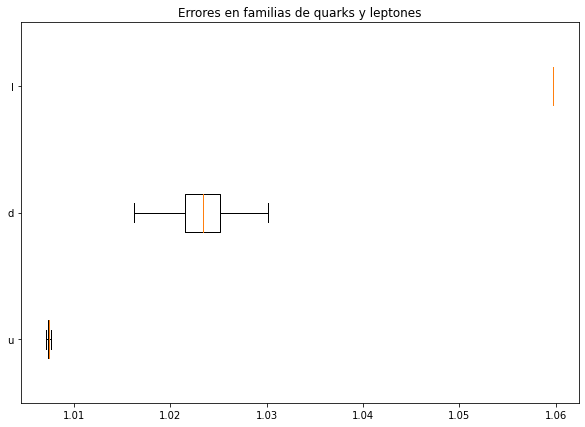

In [198]:
data1 = np.random.normal(C01, DC01, 500)
data2 = np.random.normal(C02, DC02, 500)
data3 = np.random.normal(C03, DC03, 500)
data = [data1,data2,data3]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.boxplot(data, labels=['u', 'd', 'l'], vert=0, showfliers=False)
plt.title("Errores en familias de quarks y leptones")
#plt.savefig("graf1.png", dpi=300)
plt.show()

$\large{Dirac}$

In [199]:
C03 = 2*np.sqrt(3/2)*matrixdot(l0, Ml)
print('C_03=',C03)
C33 = 2*matrixdot(l3, Ml)
print('C_33=', C33)

C83 = 2*matrixdot(l8, Ml)
print('C_83',C83)

m3 = 0.05
m1 = (m3*C33+m3*np.sqrt(3)*C83)/2+m3
print('m_1=',m1)

m2 = (m3*np.sqrt(3)*C83-m3*C33)/2+m3
print('m_2=',m2)

print('m_3=',m3)

C_03= 1.0597510721159797
C_33= -0.05917591143928053
C_83 -1.120203240808722
m_1= 1.4379016917476228e-05
m_2= 0.002973174588881508
m_3= 0.05


In [200]:
D2m_21 = m2**2-m1**2
print(D2m_21)
D2m_32 = m3**2-m2**2
print(D2m_32)

8.83956037984321e-06
0.00249116023286403


$\Delta (m_{21})^2= 8.83956037984321e-06$

$\Delta (m_{32})^2=0.00249116023286403$

Ahora queremos representar gráficamente la relación entre estas diferencias de masa y la masa fija.

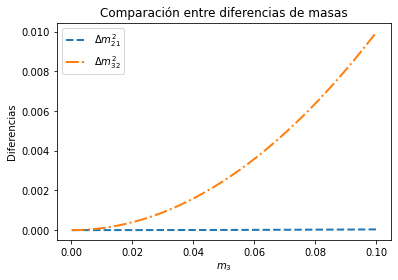

In [201]:
x = np.linspace(1e-4,1e-1,100)
def m_1(x):
    return ((x/2)*(C33+C03)-x/2)
#m10=(x*(C33+C03)-x/2)

def m_2(x):
    return ((x*C03-x-x*C33)/2)
#m20=x*C03-x/2-x*C33

y1 = m_2(x)**2-m_1(x)**2
y2 = x**2-m_2(x)**2

fig, ax = plt.subplots()

line1, = ax.plot(x, y1, linewidth=2.0, label='$\Delta m_{21}^2$', linestyle='dashed')
line2, = ax.plot(x, y2, linewidth=2.0, label='$\Delta m_{32}^2$', linestyle='dashdot')

ax.set_xlabel('$m_3$')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre diferencias de masas')

ax.legend()
#plt.savefig("graf2.png", dpi=300)
plt.show()

In [202]:
m_1(0.05), m_2(0.05)

(1.4379016917483167e-05, 0.0029731745888815055)

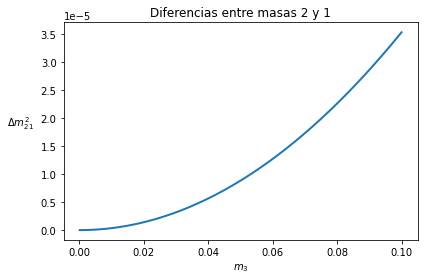

In [203]:
x = np.linspace(1e-4,1e-1,100)

fig, ax = plt.subplots()

ax.plot(x, y1, linewidth=2.0)
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\Delta m_{21}^2$', rotation=0, labelpad=20)
ax.set_title('Diferencias entre masas 2 y 1')

plt.tight_layout()
#plt.savefig("graf2-1.png", dpi=300)
plt.show()

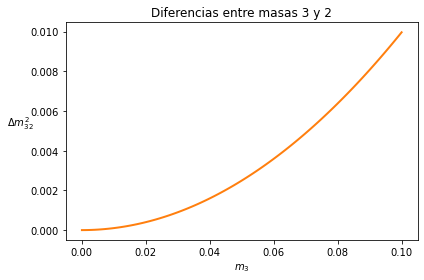

In [204]:
fig, ax = plt.subplots()

ax.plot(x, y2, linewidth=2.0, color='tab:orange')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\Delta m_{32}^2$',rotation=0, labelpad=10)
ax.set_title('Diferencias entre masas 3 y 2')

plt.tight_layout()
#plt.savefig("graf2-2.png", dpi=300)
plt.show()

$\large{Majorana: Caso\; 1}$

Para el caso en que $\delta _1 +\delta _2=0$, $\quad \delta _1 - \delta _2=\delta$

In [205]:
t1 = np.linspace(-0.25, 0, 100)
def m1m2(x,t):
    return ((x*(C33+C03)-(x+t))/2)

def m2m2(x,t):
    return ((x*(C03-C33)-(x-t))/2)

In [206]:
m1m2(0.05,0)

1.4379016917483167e-05

In [207]:
m2m2(0.05,0)

0.0029731745888815046

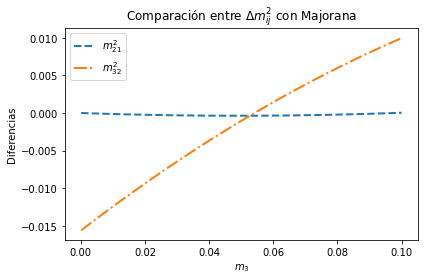

In [208]:
y1m2 = m2m2(x,t1)**2-m1m2(x,t1)**2
y2m2 = x**2-m2m2(x,t1)**2

fig, ax = plt.subplots()

line1, = ax.plot(x, y1m2, linewidth=2.0, label='$m_{21}^2$', linestyle='dashed')
line2, = ax.plot(x, y2m2, linewidth=2.0, label='$m_{32}^2$', linestyle='dashdot')
ax.set_xlabel('$m_3$')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre $\Delta m_{ij}^2$ con Majorana')

ax.legend()
plt.tight_layout()
#plt.savefig("graf5.png", dpi=300)
plt.show()

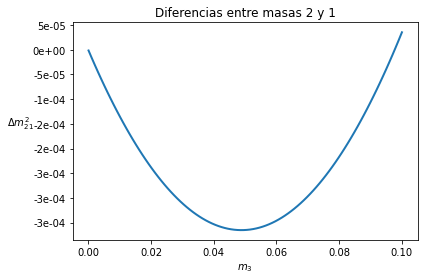

In [229]:
fig, ax = plt.subplots()

ax.plot(x, y1m2, linewidth=2.0)
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\Delta m_{21}^2$', rotation=0, labelpad=12)
ax.set_title('Diferencias entre masas 2 y 1')

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.tight_layout()
plt.savefig("graf5-1.png", dpi=300)
plt.show()

Repitiendo el proceso pero ahora incluyendo los valores experimentales $(\Delta m^2_{21})_{\mathrm{Exp}}$ y $(\Delta m^2_{32})_{\mathrm{Exp}}$ y comparando las gráficas con las calculadas anteriormente

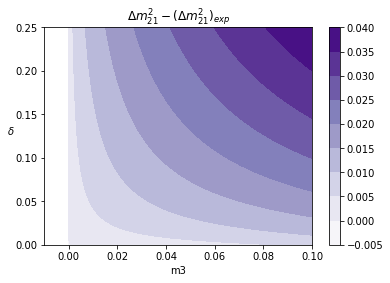

In [210]:
xlist_1 = np.linspace(0, 1e-1, 100)
ylist_1 = np.linspace(0, 0.25, 100)

X_1, Y_1 = np.meshgrid(xlist_1, ylist_1)
Z1_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
fig,ax = plt.subplots()

cp3 = ax.contourf(X_1, Y_1, Z1_0-7.42e-5, cmap='Purples')
#ax.clabel(cp3, inline=True, fontsize=10)

fig.colorbar(cp3)
ax.set_title('$\Delta m_{21}^2 - (\Delta m_{21}^2)_{exp}$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)

plt.xlim([-0.01,0.1])
#plt.savefig("g1morado.png", dpi=300)
plt.show()

/tmp/ipykernel_8250/3771366116.py:1: RuntimeWarning: invalid value encountered in sqrt
  Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


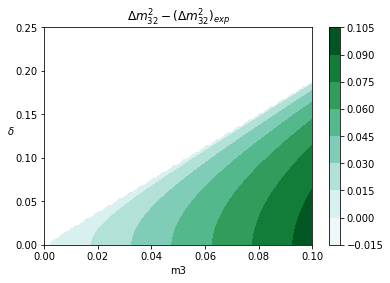

In [211]:
Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)
fig,ax = plt.subplots()

cp4 = ax.contourf(X_1, Y_1, Z1_1-2.515e-3, cmap= 'BuGn')
#ax.clabel(cp4, inline=True, fontsize=10)


fig.colorbar(cp4, extend='both')
ax.set_title('$\Delta m_{32}^2 - (\Delta m_{32}^2)_{exp}$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)
#plt.savefig("g2verde.png", dpi=300)

#plt.xlim(0, 0.03)
#plt.ylim(0,0.1)
plt.show()

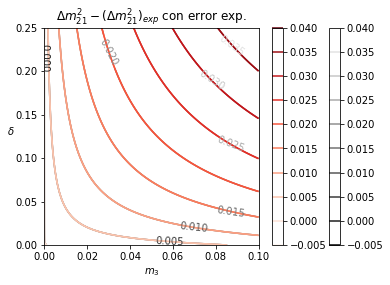

In [212]:
#Para m21 con zoom 
fig,ax = plt.subplots()

Z2_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)

cp5 = ax.contour(X_1, Y_1, Z2_0-7.42e-5, cmap='gray' )
cp6 = ax.contour(X_1, Y_1, (Z2_0-7.42e-5)+0.21e-5, cmap='Reds')
cp7 = ax.contour(X_1, Y_1, (Z2_0-7.42e-5)-0.21e-5, cmap='Reds')
ax.clabel(cp5, inline=True, fontsize=10)

fig.colorbar(cp5)
fig.colorbar(cp6)
ax.set_title('$\Delta m_{21}^2 - (\Delta m_{21}^2)_{exp}$ con error exp.')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$',rotation=0)

#plt.xlim([0.001,0.0012])
#plt.ylim([0,0.0002])
#plt.savefig("g3-1.png", dpi=300)
plt.show()

/tmp/ipykernel_8250/253958848.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


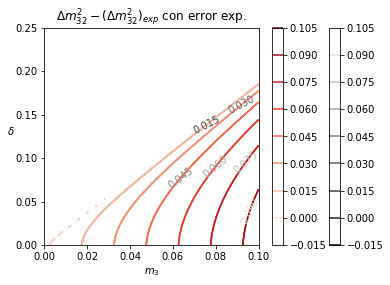

In [213]:
#Para m32 con zoom
fig,ax = plt.subplots()

Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)

cp8 = ax.contour(X_1, Y_1, Z3_0-2.515e-3 ,cmap='gray' )
cp9 = ax.contour(X_1, Y_1, (Z3_0-2.515e-3)+0.028e-3, cmap='Reds')
cp10 = ax.contour(X_1, Y_1, (Z3_0-2.515e-3)-0.028e-3, cmap='Reds')
ax.clabel(cp8, inline=True, fontsize=10)

fig.colorbar(cp8)
fig.colorbar(cp9)
ax.set_title('$\Delta m_{32}^2 - (\Delta m_{32}^2)_{exp}$ con error exp.')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$', rotation=0)

#plt.xlim([0.002,0.003])
#plt.ylim([0,0.002])
#plt.savefig("g4.png", dpi=300)
plt.show()

/tmp/ipykernel_8250/3466060170.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


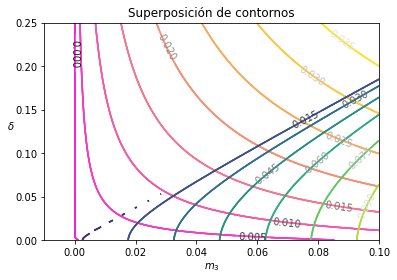

In [214]:
fig,ax=plt.subplots()

Z2_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)

cp5 = ax.contour(X_1, Y_1, Z2_0-7.42e-5, cmap='gray' )
cp6 = ax.contour(X_1, Y_1, (Z2_0-7.42e-5)+0.21e-5, cmap='spring')
cp7 = ax.contour(X_1, Y_1, (Z2_0-7.42e-5)-0.21e-5, cmap='spring')
ax.clabel(cp5, inline=True, fontsize=10)

cp8 = ax.contour(X_1, Y_1, Z3_0-2.515e-3 ,cmap='gray' )
cp9 = ax.contour(X_1, Y_1, (Z3_0-2.515e-3)+0.028e-3, cmap='viridis')
cp10 = ax.contour(X_1, Y_1, (Z3_0-2.515e-3)-0.028e-3, cmap='viridis')
ax.clabel(cp8, inline=True, fontsize=10)

#fig.colorbar(cp8)
#fig.colorbar(cp9)
ax.set_title('Superposición de contornos')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$', rotation=0)

#plt.xlim([0.0,0.003])
#plt.ylim([-0.001,0.002])
plt.xlim([-0.01,0.1])
#plt.ylim([0.01955,0.01965])
#plt.savefig("g5.png", dpi=300)
plt.show()

$\large{Majorana: Caso\; 2}$

In [215]:
x = np.linspace(1e-4,1e-1,100)
r1 = np.linspace(0, 0.7, 100)
r2 = np.linspace(0, 0.7, 100)
def m13(x,r1):
    return ((x*r1*(C33+C03)-(x*r1))/2)

def m23(x,r2):
    return ((x*r2*(C03-C33)-(x*r2))/2)

In [216]:
m13(0.05,1) == m1m2(0.05,0)
m23(0.05,1) == m2m2(0.05,0)

True

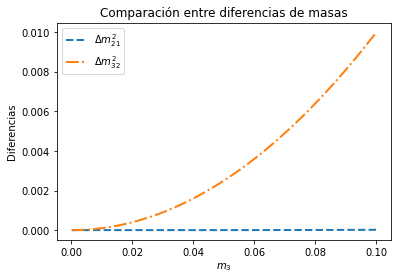

In [217]:
y1 = m23(x,r2)**2-m13(x,r1)**2
y2 = x**2-m23(x,r2)**2

fig, ax = plt.subplots()

line1, = ax.plot(x, y1, linewidth=2.0, label='$\Delta m_{21}^2$', linestyle='dashed')
line2, = ax.plot(x, y2, linewidth=2.0, label='$\Delta m_{32}^2$', linestyle='dashdot')

ax.set_xlabel('$m_3$')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre diferencias de masas')

ax.legend()
#plt.savefig("g6.png", dpi=300)
plt.show()

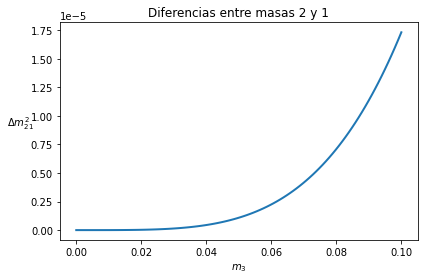

In [218]:
fig, ax = plt.subplots()

ax.plot(x, y1, linewidth=2.0)
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\Delta m_{21}^2$',rotation=0, labelpad=10)
ax.set_title('Diferencias entre masas 2 y 1')

plt.tight_layout()
#plt.savefig("g7.png", dpi=300)
plt.show()

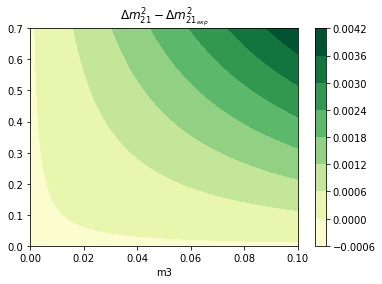

In [219]:
from turtle import color


xlist_2 = np.linspace(0, 1e-1, 100)
ylist_2 = np.linspace(0, 0.7, 100)

X_2, Y_2 = np.meshgrid(xlist_2, ylist_2)
Z0_1 = np.sqrt((m23(X_2,Y_2))**2-m13(X_2,Y_2)**2)
fig,ax = plt.subplots()

cp1_1 = ax.contourf(X_2, Y_2, Z0_1-7.42e-5, cmap='YlGn')
#ax.clabel(cp1_1, inline=True, fontsize=10)

fig.colorbar(cp1_1)
ax.set_title('$\Delta m_{21}^2 - \Delta m_{21_{exp}}^2$')
ax.set_xlabel('m3')
#ax.set_ylabel('$\delta$', rotation=0)

#plt.savefig("g8verde.png", dpi=300)
plt.show()

In [220]:
xlist_2.shape

(100,)

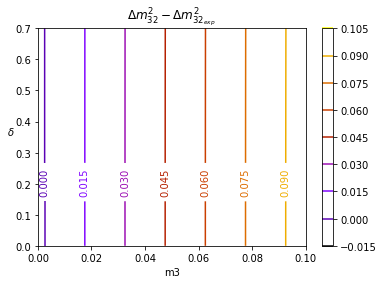

In [221]:
Z0_2 = np.sqrt(X_2**2-m23(X_2,Y_2)**2)
fig,ax = plt.subplots()

cp2_1 = ax.contour(X_2, Y_2, Z0_2-2.515e-3, cmap= 'gnuplot')
ax.clabel(cp2_1, inline=True, fontsize=10)

fig.colorbar(cp2_1, extend='both')
ax.set_title('$\Delta m_{32}^2 - \Delta m_{32_{exp}}^2$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)
#plt.savefig("g9morado.png", dpi=300)
plt.show()

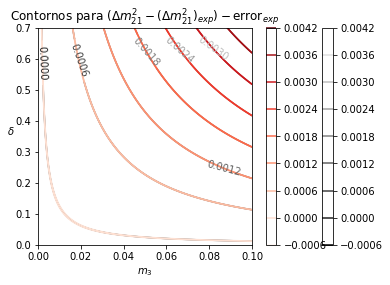

In [222]:
#Para m21 con zoom 
fig,ax = plt.subplots()

Z0_1 = np.sqrt((m23(X_2,Y_2))**2-m13(X_2,Y_2)**2)

cp1_1 = ax.contour(X_2, Y_2, Z0_1-7.42e-5, cmap='gray')
cp1_2 = ax.contour(X_2, Y_2, (Z0_1-7.42e-5)+0.21e-5, cmap='Reds')
cp1_3 = ax.contour(X_2, Y_2, (Z0_1-7.42e-5)-0.21e-5, cmap='Reds')
ax.clabel(cp1_1, inline=True, fontsize=10)

fig.colorbar(cp1_1)
fig.colorbar(cp1_2)
ax.set_title('Contornos para $(\Delta m_{21}^2 - (\Delta m_{21}^2)_{exp})-\mathrm{error}_{exp}$')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$',rotation=0)

#plt.xlim([0,0.04])
#plt.ylim([0,0.1])
#plt.savefig("g10.png", dpi=300)
plt.show()

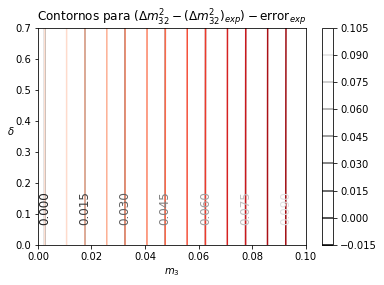

In [223]:
#Para m21 con zoom 
fig,ax = plt.subplots()

Z0_2 = np.sqrt(X_2**2-m23(X_2,Y_2)**2)

cp2_1 = ax.contour(X_2, Y_2, Z0_2-2.515e-3, cmap= 'gray')
cp2_2 = ax.contour(X_2, Y_2, (Z0_2-2.515e-3)+0.0218-3, cmap='Reds')
cp2_3 = ax.contour(X_2, Y_2, (Z0_2-2.515e-3)-0.028e-3, cmap='Reds')
ax.clabel(cp2_1, inline=False, fontsize=12)

fig.colorbar(cp2_1)
#fig.colorbar(cp2_2)
ax.set_title('Contornos para $(\Delta m_{32}^2 - (\Delta m_{32}^2)_{exp})-\mathrm{error}_{exp}$')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$',rotation=0)

#plt.xlim([0,0.04])
#plt.ylim([0,0.1])
#plt.savefig("g11-1.png", dpi=300)
plt.show()

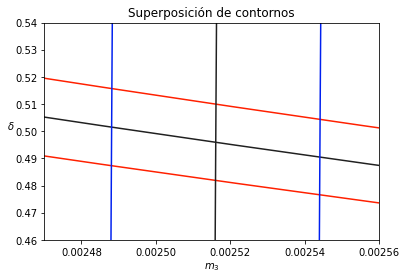

In [224]:
fig,ax=plt.subplots()

Z0_1 = np.sqrt((m23(X_2,Y_2))**2-m13(X_2,Y_2)**2)
Z0_2 = np.sqrt(X_2**2-m23(X_2,Y_2)**2)

cp1_1 = ax.contour(X_2, Y_2, Z0_1-7.42e-5, cmap='gray')
cp1_2 = ax.contour(X_2, Y_2, (Z0_1-7.42e-5)+0.21e-5, cmap='autumn')
cp1_3 = ax.contour(X_2, Y_2, (Z0_1-7.42e-5)-0.21e-5, cmap='autumn')
ax.clabel(cp1_1, inline=True, fontsize=10)

cp2_1 = ax.contour(X_2, Y_2, Z0_2-2.515e-3, cmap= 'gray')
cp2_2 = ax.contour(X_2, Y_2, (Z0_2-2.515e-3)+0.028e-3, cmap='winter')
cp2_3 = ax.contour(X_2, Y_2, (Z0_2-2.515e-3)-0.028e-3, cmap='winter')
ax.clabel(cp2_1, inline=True, fontsize=10)

#fig.colorbar(cp1_1)
#fig.colorbar(cp2_1)
ax.set_title('Superposición de contornos')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$', rotation=0)

plt.xlim([0.00247,0.00256])
plt.ylim([0.46,0.54])
#ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
#plt.tight_layout()

#plt.savefig("g12-1b.png", dpi=300)
plt.show()

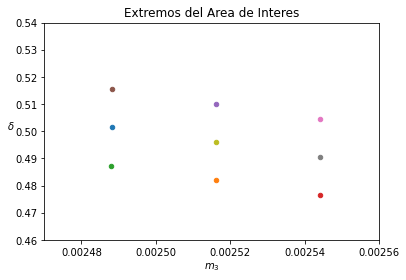

In [225]:
def find_intersections(A, B):
    #this function stolen from https://stackoverflow.com/questions/3252194/numpy-and-line-intersections#answer-9110966
    # min, max and all for arrays
    amin = lambda x1, x2: np.where(x1<x2, x1, x2)
    amax = lambda x1, x2: np.where(x1>x2, x1, x2)
    aall = lambda abools: np.dstack(abools).all(axis=2)
    slope = lambda line: (lambda d: d[:,1]/d[:,0])(np.diff(line, axis=0))

    x11, x21 = np.meshgrid(A[:-1, 0], B[:-1, 0])
    x12, x22 = np.meshgrid(A[1:, 0], B[1:, 0])
    y11, y21 = np.meshgrid(A[:-1, 1], B[:-1, 1])
    y12, y22 = np.meshgrid(A[1:, 1], B[1:, 1])

    m1, m2 = np.meshgrid(slope(A), slope(B))
    m1inv, m2inv = 1/m1, 1/m2

    yi = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi = (yi - y21)*m2inv + x21
    
    yi_1 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_1 = (yi - y21)*m2inv + x21
    
    yi_2 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_2 = (yi - y21)*m2inv + x21
    
    yi_3 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_3 = (yi - y21)*m2inv + x21

    xconds = (amin(x11, x12) < xi, xi <= amax(x11, x12), 
              amin(x21, x22) < xi, xi <= amax(x21, x22) )
    yconds = (amin(y11, y12) < yi, yi <= amax(y11, y12),
              amin(y21, y22) < yi, yi <= amax(y21, y22) )

    return xi[aall(xconds)], yi[aall(yconds)]

X_2, Y_2 = np.meshgrid(xlist_2, ylist_2)
Z0_1 = np.sqrt((m23(X_2,Y_2))**2-m13(X_2,Y_2)**2)
Z0_2 = np.sqrt(X_2**2-m23(X_2,Y_2)**2)
cp1_1 = ax.contour(X_2, Y_2, Z0_1-7.42e-5, cmap='gray')
cp1_2 = ax.contour(X_2, Y_2, (Z0_1-7.42e-5)+0.21e-5, cmap='autumn')
cp1_3 = ax.contour(X_2, Y_2, (Z0_1-7.42e-5)-0.21e-5, cmap='autumn')
ax.clabel(cp1_1, inline=True, fontsize=10)

cp2_1 = ax.contour(X_2, Y_2, Z0_2-2.515e-3, cmap= 'gray')
cp2_2 = ax.contour(X_2, Y_2, (Z0_2-2.515e-3)+0.028e-3, cmap='winter')
cp2_3 = ax.contour(X_2, Y_2, (Z0_2-2.515e-3)-0.028e-3, cmap='winter')
ax.clabel(cp2_1, inline=True, fontsize=10)


xi = np.array([])
yi = np.array([])
for linecol in cp1_1.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_2.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi = np.append(xi, xinter)
                yi = np.append(yi, yinter)
                
xi_1 = np.array([])
yi_1 = np.array([])
for linecol in cp1_2.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_1.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_1 = np.append(xi_1, xinter)
                yi_1 = np.append(yi_1, yinter)
                
xi_2 = np.array([])
yi_2 = np.array([])
for linecol in cp1_2.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_2.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_2 = np.append(xi_2, xinter)
                yi_2 = np.append(yi_2, yinter)
                
xi_3 = np.array([])
yi_3 = np.array([])
for linecol in cp1_2.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_3.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_3 = np.append(xi_3, xinter)
                yi_3 = np.append(yi_3, yinter)

                
                
                
                
                
xi_4 = np.array([])
yi_4 = np.array([])
for linecol in cp1_3.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_1.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_4 = np.append(xi_4, xinter)
                yi_4 = np.append(yi_4, yinter)
                
                
xi_5 = np.array([])
yi_5 = np.array([])
for linecol in cp1_3.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_2.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_5 = np.append(xi_5, xinter)
                yi_5 = np.append(yi_5, yinter)
                
                
xi_6 = np.array([])
yi_6 = np.array([])
for linecol in cp1_3.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_3.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_6 = np.append(xi_6, xinter)
                yi_6 = np.append(yi_6, yinter)
                

xi_7 = np.array([])
yi_7 = np.array([])
for linecol in cp1_1.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_3.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_7 = np.append(xi_7, xinter)
                yi_7 = np.append(yi_7, yinter)
                

xi_8 = np.array([])
yi_8 = np.array([])
for linecol in cp1_1.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_1.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_8 = np.append(xi_8, xinter)
                yi_8 = np.append(yi_8, yinter)
                
plt.scatter(xi, yi, s=20)
plt.scatter(xi_1, yi_1, s=20)
plt.scatter(xi_2, yi_2, s=20)
plt.scatter(xi_3, yi_3, s=20)
plt.scatter(xi_4, yi_4, s=20)
plt.scatter(xi_5, yi_5, s=20)
plt.scatter(xi_6, yi_6, s=20)
plt.scatter(xi_7, yi_7, s=20)
plt.scatter(xi_8, yi_8, s=20)

plt.title('Extremos del Area de Interes')
plt.xlabel('$m_3$')
plt.ylabel('$\delta$', rotation=0)

plt.xlim([0.00247,0.00256])
plt.ylim([0.46,0.54])
#plt.savefig("gpuntos.png", dpi=300)

plt.show()

In [226]:
print(xi_8)
print(yi_8)

[0.00251609 0.01751516 0.03251509 0.04751506 0.06251504 0.07751504
 0.09251503 0.01752797 0.03252199 0.04751978 0.06251864 0.07751793
 0.09251746 0.03253996 0.04753208 0.06252799 0.07752547 0.09252378
 0.04755195 0.06254309 0.07753766 0.09253398 0.06256394 0.07755448
 0.09254808 0.07757594 0.09256606 0.09258794]
[0.49595503 0.07125411 0.03838283 0.02626242 0.01996114 0.01609856
 0.01348835 0.64688145 0.34864456 0.23860369 0.1813611  0.14627005
 0.12255534 0.65853596 0.45082881 0.34270884 0.27641264 0.23160684
 0.6628387  0.50396125 0.40650867 0.34062757 0.66507113 0.53651835
 0.44960761 0.66645167 0.55851547 0.66738041]
